In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
#import cufflinks as cf
import seaborn as sns
#import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#%matplotlib inline
import scipy as stats
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)


In [149]:
df = pd.read_csv("final_15.csv")#.drop_duplicates(subset='url',keep='first',inplace=True)

In [150]:
df[["publish_year","series","num_pages"]]=df[["publish_year","series","num_pages"]].astype(int)

df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
title              object
author             object
Reviews           float64
Total_ratings     float64
Average_rating    float64
num_pages           int32
publish_year        int32
series              int32
genres             object
awards             object
places             object
url                object
awards_count        int64
dtype: object

In [152]:
df.drop_duplicates(subset='url',keep='first',inplace=True)

In [153]:
df.Average_rating.value_counts().sum()

3586

In [154]:
df['genres']=df['genres'].fillna("Fantasy,Fiction")
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
title             0
author            0
Reviews           0
Total_ratings     0
Average_rating    0
num_pages         0
publish_year      0
series            0
genres            0
awards            0
places            0
url               0
awards_count      0
dtype: int64

In [155]:
df['genres'].value_counts()

Fantasy,Fiction                                                      480
Fantasy,Fiction,Fantasy , Epic Fantasy                               303
Fantasy                                                              219
Fantasy,Young Adult,Fiction                                          180
Fantasy,Fiction,Science Fiction Fantasy                              110
                                                                    ... 
Historical , Historical Fiction,Young Adult,Adventure , Pirates        1
Fantasy,Fantasy , Dark Fantasy,Heroic Fantasy , Sword and Sorcery      1
Fantasy,Romance , M M Romance,Fantasy , Magic                          1
Fantasy,Fiction,Writing , Books About Books                            1
Adventure,Science Fiction                                              1
Name: genres, Length: 733, dtype: int64

In [157]:
def convert_status_to_description(x):
    if x['series'] == 0:
        return 'False'
    elif x['series'] == 1:
        return 'True'
    
df['series_bol'] = df.apply(convert_status_to_description,axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,title,author,Reviews,Total_ratings,Average_rating,num_pages,publish_year,series,genres,awards,places,url,awards_count,series_bol
0,0,0,The Name of the Wind,Patrick Rothfuss,0.254721,0.100513,0.902,662,2007,1,"Fantasy,Fiction,Fantasy , Epic Fantasy",Locus Award Nominee for Best First Novel and B...,0,https://www.goodreads.com/book/show/186074.The...,7,True
1,1,1,Eragon,Christopher Paolini,0.131217,0.195167,0.784,503,2002,1,"Fantasy,Young Adult,Fiction",0,0,https://www.goodreads.com/book/show/113436.Eragon,0,True
2,2,2,The Lies of Locke Lamora,Scott Lynch,0.092227,0.032420,0.850,752,2006,1,"Fantasy,Fiction,Adventure",Locus Award Nominee for Best Fantasy Novel and...,Camorr,https://www.goodreads.com/book/show/29588376-t...,5,True
3,3,3,Graceling,Kristin Cashore,0.132092,0.053672,0.812,471,2008,1,"Fantasy,Young Adult,Romance",Locus Award Nominee for Best First Novel (2009...,0,https://www.goodreads.com/book/show/3236307-gr...,15,True
4,4,4,A Storm of Swords,George R.R. Martin,0.127213,0.088465,0.906,1177,2000,1,"Fantasy,Fiction,Fantasy , Epic Fantasy","Hugo Award Nominee for Best Novel (2001), Nebu...","Westeros,Essos",https://www.goodreads.com/book/show/62291.A_St...,5,True


In [167]:
def convert_status_to_descriptions(x):
    if x['Average_rating'] <= 0.500 :
        return 'Bad'
    elif   x['Average_rating'] >0.500 and x['Average_rating']<=0.600:
        return 'Average'
    elif x['Average_rating'] >0.600 and x['Average_rating']<=0.700:
        return 'Above average'
    elif x['Average_rating'] >0.700 and x['Average_rating']<=0.800:
        return 'Good'
    elif x['Average_rating'] >0.800 and x['Average_rating']<=0.900:
        return 'Very good'
    elif  x['Average_rating'] >0.900 and x['Average_rating']<=1.000:
        return 'Execellent'
df['Rating'] = df.apply(convert_status_to_descriptions,axis=1)
df.tail(10)

,Unnamed: 0,Unnamed: 0.1,title,author,Reviews,Total_ratings,Average_rating,num_pages,publish_year,series,genres,awards,places,url,awards_count,series_bol,Rating,Pages_class
3576,3616,3706,Blood and Iron,Elizabeth Bear,0.000947,0.000166,0.688,448,2006,1,"Fantasy,Fantasy , Urban Fantasy,Fiction",0,0,https://www.goodreads.com/book/show/185637.Blo...,0,True,Above average,Long
3577,3617,3707,City of the Dead,S.D. Perry,0.001069,0.000508,0.806,352,1999,1,"Horror,Horror , Zombies,Fiction",0,Raccoon City,https://www.goodreads.com/book/show/90578.City...,0,True,Very good,Medium
3578,3618,3708,The Road Home,Joel Rosenberg,0.000072,0.000126,0.752,320,1995,1,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/390175.The...,0,True,Good,Medium
3579,3619,3709,The Road to Ehvenor,Joel Rosenberg,0.000111,0.000147,0.742,320,1991,1,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/390170.The...,0,True,Good,Medium
3580,3620,3710,The Warrior Lives,Joel Rosenberg,0.000145,0.000268,0.768,272,1988,1,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/1100379.Th...,0,True,Good,Medium
3581,3621,3711,Ilario: The Lion's Eye,Mary Gentle,0.000206,0.000039,0.694,672,2006,1,"Fantasy,Fiction,Historical , Historical Fiction",Sidewise Award Nominee for Alternate History (...,0,https://www.goodreads.com/book/show/986598.Ilario,1,True,Above average,Long
3582,3622,3712,The Shattered Gates,Ginn Hale,0.001743,0.000292,0.756,110,2011,1,"Fantasy,Romance , M M Romance,LGBT",0,0,https://www.goodreads.com/book/show/10428720-t...,0,True,Good,Short
3583,3623,3713,Deryni Magic,Katherine Kurtz,0.000039,0.000118,0.786,370,1990,0,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/590154.Der...,0,False,Good,Medium
3584,3624,3714,The Deryni Archives,Katherine Kurtz,0.000061,0.000203,0.788,325,1986,1,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/537122.The...,0,True,Good,Medium
3585,3625,3715,The Bastard Prince,Katherine Kurtz,0.000184,0.000184,0.806,433,1994,1,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/537109.The...,0,True,Very good,Long


In [1]:
def convert_status_to_descriptionss(x):
    if x['num_pages'] >2 and x['num_pages']<=50:
        return 'Very short'
    elif   x['num_pages'] >50 and x['num_pages']<=200:
        return 'Short'
    elif x['num_pages'] >200 and x['num_pages']<=400:
        return 'Medium'
    elif x['num_pages'] >400 and x['num_pages']<=1000:
        return 'Long'
    elif x['num_pages'] >1000:
        return 'Very Long'
    else:
        return "E-Books"

df['Pages_class'] = df.apply(convert_status_to_descriptionss,axis=1)
df.tail(20)

NameError: name 'df' is not defined

In [169]:
df.num_pages.value_counts().sum()

3586

In [170]:
#px.scatter(df["Pages_class"],df["num_pages"],color=df["Pages_class"])

#px.scatter(df,x='num_pages', y='Reviews',color="Rating")
fig_scatter_1 = px.scatter(df,x='num_pages', y='Reviews',color="Rating",
            labels={'num_pages':'Number of pages',
            'Reviews':'Number of reviews(normalized)',
            "Rating":'Rating range'})
fig_scatter_1.show()

In [171]:
#px.scatter(df,x='num_pages', y='Average_rating',color="Pages_class")
fig_scatter_2 = px.scatter(df,x='num_pages', y='Average_rating',color="Pages_class",
            labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range'})

fig_scatter_2.show()


In [173]:
fig = px.pie(df, values='num_pages', names='Pages_class', title='Pages range',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [181]:
fig = px.pie(df, values='Average_rating', names='Rating', title='Shares of Rating',color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [186]:
#px.scatter(df["Rating"],df["Average_rating"],color=df["Rating"])
fig_scatter_3 = px.scatter(df,x='Rating', y='Average_rating',color="Rating",
            labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range'},title="Division of Average rating")

fig_scatter_3.show()

In [188]:

fig_scatter_4 = px.scatter(df,x='Average_rating', y='Reviews',color="Rating",
            labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range'})

fig_scatter_4.show()

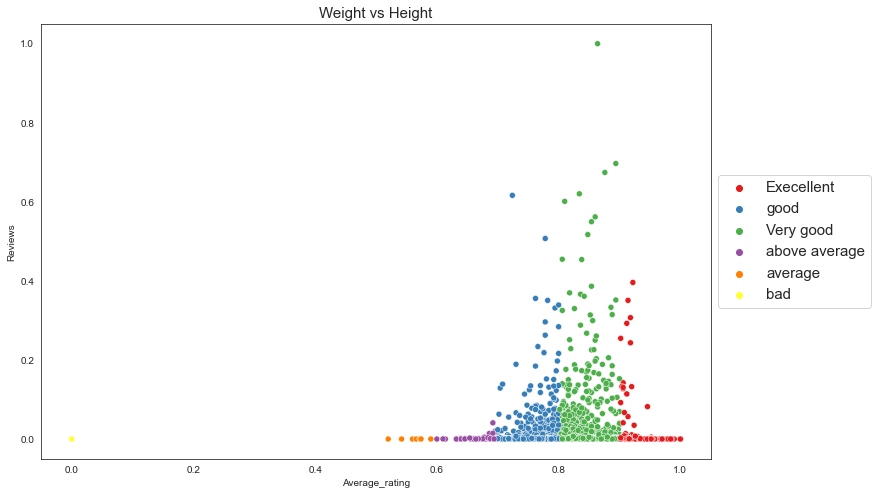

In [118]:
plt.figure(figsize=(15,12))
sns.set_style("white")
sns.scatterplot( x='Average_rating', y='Reviews', data=df, hue='Rating',legend=True,palette="Set1")
ax1 = plt.gca()
ax1.set_title('Weight vs Height', size=15)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

In [193]:
Genres = df['genres'].value_counts()
print(len(Genres))
Genres.head(20)

733


Fantasy,Fiction                                    480
Fantasy,Fiction,Fantasy , Epic Fantasy             303
Fantasy                                            219
Fantasy,Young Adult,Fiction                        180
Fantasy,Fiction,Science Fiction Fantasy            110
Fantasy,Fantasy , Epic Fantasy,Fiction              90
Fantasy,Young Adult,Romance                         79
Fantasy,Fiction,Fantasy , High Fantasy              66
Fantasy,Fiction,Science Fiction                     56
Fantasy,Fiction,Fantasy , Magic                     53
Fantasy,Fiction,Young Adult                         47
Fantasy,Young Adult,Fantasy , Magic                 46
Fantasy,Science Fiction,Fiction                     46
Fantasy,Fiction,Humor                               31
Fantasy,Fantasy , Dragons,Fiction                   31
Fantasy,Fiction,Classics                            30
Fantasy,Historical , Historical Fiction,Fiction     26
Fantasy,Romance,Fiction                             25
Fantasy,Fa

In [194]:
df2=df.pivot_table(index='title',values='awards_count',aggfunc='sum').sort_values('awards_count',ascending=False).head(50)

In [205]:
fig = px.bar(df2,x=df2.index,y="awards_count",category_orders=dict(a="awards_count"),color_discrete_sequence=px.colors.sequential.Inferno,
labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range',
            "title":"Movie names",
            "awards_count":"Number of awards received"})
fig.update_layout(bargap=0.2)
fig.show()

In [122]:

fig = px.histogram(df,x="author",category_orders=dict(a="title"))
fig.update_layout(bargap=0.2)
fig.show()

In [200]:
df1=df.pivot_table(index='author',values='awards_count',aggfunc='sum').sort_values('awards_count',ascending=False).head(50)

In [206]:
fig = px.bar(df1,x=df1.index,y="awards_count",category_orders=dict(a="awards_count"),color_discrete_sequence=px.colors.sequential.Cividis,
labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range',
            "title":"Movie names",
            "awards_count":"Number of awards received",
            "author":"Author names"})
fig.update_layout(bargap=0.2)
fig.show()

In [207]:
df4=df
df4["Book_count"]=1
df4=df4[df["publish_year"]>0]
df4

,Unnamed: 0,Unnamed: 0.1,title,author,Reviews,Total_ratings,Average_rating,num_pages,publish_year,series,genres,awards,places,url,awards_count,series_bol,Rating,Pages_class,Book_count
0,0,0,The Name of the Wind,Patrick Rothfuss,0.254721,0.100513,0.902,662,2007,1,"Fantasy,Fiction,Fantasy , Epic Fantasy",Locus Award Nominee for Best First Novel and B...,0,https://www.goodreads.com/book/show/186074.The...,7,True,Execellent,Long,1
1,1,1,Eragon,Christopher Paolini,0.131217,0.195167,0.784,503,2002,1,"Fantasy,Young Adult,Fiction",0,0,https://www.goodreads.com/book/show/113436.Eragon,0,True,Good,Long,1
2,2,2,The Lies of Locke Lamora,Scott Lynch,0.092227,0.032420,0.850,752,2006,1,"Fantasy,Fiction,Adventure",Locus Award Nominee for Best Fantasy Novel and...,Camorr,https://www.goodreads.com/book/show/29588376-t...,5,True,Very good,Long,1
3,3,3,Graceling,Kristin Cashore,0.132092,0.053672,0.812,471,2008,1,"Fantasy,Young Adult,Romance",Locus Award Nominee for Best First Novel (2009...,0,https://www.goodreads.com/book/show/3236307-gr...,15,True,Very good,Long,1
4,4,4,A Storm of Swords,George R.R. Martin,0.127213,0.088465,0.906,1177,2000,1,"Fantasy,Fiction,Fantasy , Epic Fantasy","Hugo Award Nominee for Best Novel (2001), Nebu...","Westeros,Essos",https://www.goodreads.com/book/show/62291.A_St...,5,True,Execellent,Very Long,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,3621,3711,Ilario: The Lion's Eye,Mary Gentle,0.000206,0.000039,0.694,672,2006,1,"Fantasy,Fiction,Historical , Historical Fiction",Sidewise Award Nominee for Alternate History (...,0,https://www.goodreads.com/book/show/986598.Ilario,1,True,Above average,Long,1
3582,3622,3712,The Shattered Gates,Ginn Hale,0.001743,0.000292,0.756,110,2011,1,"Fantasy,Romance , M M Romance,LGBT",0,0,https://www.goodreads.com/book/show/10428720-t...,0,True,Good,Short,1
3583,3623,3713,Deryni Magic,Katherine Kurtz,0.000039,0.000118,0.786,370,1990,0,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/590154.Der...,0,False,Good,Medium,1
3584,3624,3714,The Deryni Archives,Katherine Kurtz,0.000061,0.000203,0.788,325,1986,1,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/537122.The...,0,True,Good,Medium,1


In [208]:
#Books_per_year = df['publish_year'].value_counts() 
#Books_per_year.head()
df3=df4.pivot_table(index='publish_year',values='Book_count',aggfunc='sum').sort_values('Book_count',ascending=False).head(50)
df3.head()

#px.line(df,x="publish_year",y="num_reviews")

,Book_count
publish_year,
2012,241
2013,221
2011,219
2014,185
2010,161


In [209]:
fig=px.histogram(df3,x="Book_count",nbins=10,labels={"value":'Books'},title="Books released per year",marginal="violin")
fig.show()

In [214]:
fig = px.bar(df3,x=df3.index,y="Book_count",category_orders=dict(a="Book_count"),color_discrete_sequence=px.colors.sequential.Turbo,
labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range',
            "title":"Movie names",
            "awards_count":"Number of awards received",
            "author":"Author names",
            "Book_count":"Number of Books",
            "publish_year":"Original year of publications"})

fig.update_layout(bargap=0.2)
fig.show()

In [215]:
Books_by_Author = df['author'].value_counts() 
print(Books_by_Author)

Tamora Pierce        35
David Gemmell        33
Terry Brooks         31
David Eddings        31
Margaret Weis        29
                     ..
Alys Arden            1
Graham J. Wood        1
Ryan Tyler Palmer     1
Norton Juster         1
Michael Haddad        1
Name: author, Length: 1625, dtype: int64


In [216]:
#df3=df4.pivot_table(index='publish_year',values='Book_count',aggfunc='sum').sort_values('Book_count',ascending=False).head(50)
#df3.head()
groups = df.groupby("author")
groups.head()

,Unnamed: 0,Unnamed: 0.1,title,author,Reviews,Total_ratings,Average_rating,num_pages,publish_year,series,genres,awards,places,url,awards_count,series_bol,Rating,Pages_class,Book_count
0,0,0,The Name of the Wind,Patrick Rothfuss,0.254721,0.100513,0.902,662,2007,1,"Fantasy,Fiction,Fantasy , Epic Fantasy",Locus Award Nominee for Best First Novel and B...,0,https://www.goodreads.com/book/show/186074.The...,7,True,Execellent,Long,1
1,1,1,Eragon,Christopher Paolini,0.131217,0.195167,0.784,503,2002,1,"Fantasy,Young Adult,Fiction",0,0,https://www.goodreads.com/book/show/113436.Eragon,0,True,Good,Long,1
2,2,2,The Lies of Locke Lamora,Scott Lynch,0.092227,0.032420,0.850,752,2006,1,"Fantasy,Fiction,Adventure",Locus Award Nominee for Best Fantasy Novel and...,Camorr,https://www.goodreads.com/book/show/29588376-t...,5,True,Very good,Long,1
3,3,3,Graceling,Kristin Cashore,0.132092,0.053672,0.812,471,2008,1,"Fantasy,Young Adult,Romance",Locus Award Nominee for Best First Novel (2009...,0,https://www.goodreads.com/book/show/3236307-gr...,15,True,Very good,Long,1
4,4,4,A Storm of Swords,George R.R. Martin,0.127213,0.088465,0.906,1177,2000,1,"Fantasy,Fiction,Fantasy , Epic Fantasy","Hugo Award Nominee for Best Novel (2001), Nebu...","Westeros,Essos",https://www.goodreads.com/book/show/62291.A_St...,5,True,Execellent,Very Long,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,3616,3706,Blood and Iron,Elizabeth Bear,0.000947,0.000166,0.688,448,2006,1,"Fantasy,Fantasy , Urban Fantasy,Fiction",0,0,https://www.goodreads.com/book/show/185637.Blo...,0,True,Above average,Long,1
3577,3617,3707,City of the Dead,S.D. Perry,0.001069,0.000508,0.806,352,1999,1,"Horror,Horror , Zombies,Fiction",0,Raccoon City,https://www.goodreads.com/book/show/90578.City...,0,True,Very good,Medium,1
3578,3618,3708,The Road Home,Joel Rosenberg,0.000072,0.000126,0.752,320,1995,1,"Fantasy,Fiction,Science Fiction Fantasy",0,0,https://www.goodreads.com/book/show/390175.The...,0,True,Good,Medium,1
3581,3621,3711,Ilario: The Lion's Eye,Mary Gentle,0.000206,0.000039,0.694,672,2006,1,"Fantasy,Fiction,Historical , Historical Fiction",Sidewise Award Nominee for Alternate History (...,0,https://www.goodreads.com/book/show/986598.Ilario,1,True,Above average,Long,1


In [218]:
df5 = df[df["publish_year"]>0]

In [219]:
fig = px.density_heatmap(df,x='author',y='publish_year',z='Average_rating',color_continuous_scale="viridis")
fig.show()

1010 0.902
1200 0.772
1397 0.746
1410 0.79
1472 0.808
1485 0.786
1595 0.79
1611 0.76
1667 0.762
1786 0.654
1812 0.8380000000000001
1838 0.668
1841 0.61
1853 0.8660000000000001
1858 0.784
1865 0.7893333333333334
1871 0.8119999999999999
1877 0.794
1889 0.752
1894 0.7080000000000001
1896 0.756
1897 0.766
1900 0.794
1910 0.8260000000000001
1919 0.772
1920 0.7330000000000001
1921 0.798
1922 0.7400000000000001
1924 0.766
1926 0.781
1927 0.5740000000000001
1932 0.8140000000000001
1933 0.662
1934 0.7480000000000001
1935 0.862
1936 0.828
1937 0.8570000000000001
1941 0.788
1942 0.853
1943 0.829
1945 0.8260000000000001
1946 0.782
1948 0.686
1949 0.774
1950 0.8119999999999999
1951 0.778
1952 0.8160000000000001
1953 0.782
1954 0.8565000000000002
1955 0.868
1956 0.8193333333333334
1958 0.801
1959 0.7450000000000001
1960 0.8053333333333333
1961 0.808
1962 0.8160000000000001
1963 0.78
1964 0.81
1965 0.799142857142857
1966 0.8180000000000001
1967 0.7712000000000001
1968 0.8116666666666666
1969 0.774
19

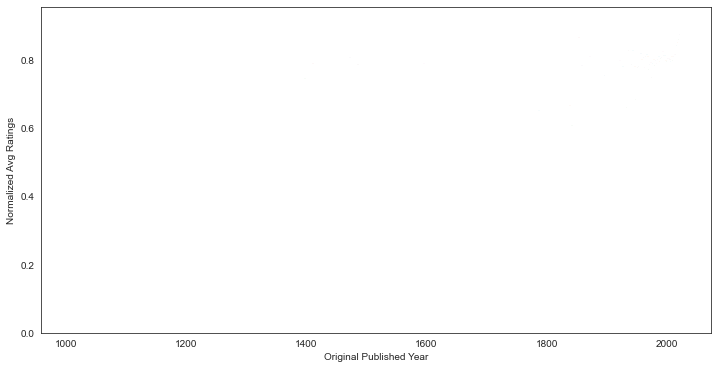

In [220]:
plt.figure(figsize=(12,6))
groups = df.groupby("publish_year")
for name, group in groups:
    print(name, group["Average_rating"].mean())
    plt.bar(group["publish_year"], group["Average_rating"].mean())
    plt.xlabel("Original Published Year")
    plt.ylabel("Normalized Avg Ratings")

In [221]:
my_genres = []
for ind, items in enumerate(df["genres"]):
    my_genres.append(items[0])
    #my_genres.append(items[1])
    #my_genres.append(items[2])

Text(0, 0.5, '')

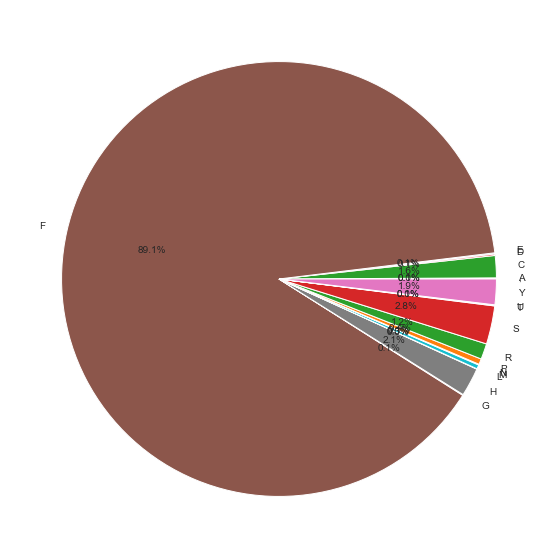

In [227]:
pie_genre = pd.DataFrame(my_genres, columns=["Genre"])
ax = pie_genre.groupby("Genre")["Genre"].count().plot.pie(figsize=(15,10),autopct='%1.1f%%', shadow=False)
ax.set_ylabel('')

In [230]:
fig = px.scatter_3d(df,x="Reviews",y="Average_rating",z="Pages_class",color="Pages_class",opacity=0.5,
labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range',
            "title":"Movie names",
            "awards_count":"Number of awards received",
            "author":"Author names",
            "Book_count":"Number of Books",
            "publish_year":"Original year of publications",
            "Pages_class":"Book type"})
fig.show()

In [231]:
fig = px.line_3d(df,x="Reviews",y="Average_rating",z="num_pages",color="Pages_class",
labels={'num_pages':'Number of pages',
            'Average_rating':'Average of rating(normalized)',
            "Rating":'Rating range',
            "title":"Movie names",
            "awards_count":"Number of awards received",
            "author":"Author names",
            "Book_count":"Number of Books",
            "publish_year":"Original year of publications",
            "Pages_class":"Book type"})
fig.show()

In [232]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'author', 'Reviews',
       'Total_ratings', 'Average_rating', 'num_pages', 'publish_year',
       'series', 'genres', 'awards', 'places', 'url', 'awards_count',
       'series_bol', 'Rating', 'Pages_class', 'Book_count'],
      dtype='object')

In [233]:
df10 = df[["title","author","Reviews","Total_ratings","Average_rating","num_pages","publish_year","series","awards_count",'Rating']]
cordata.head()

,title,author,Reviews,Total_ratings,Average_rating,num_pages,publish_year
0,The Name of the Wind,Patrick Rothfuss,0.254721,0.100513,0.902,662,2007
1,Eragon,Christopher Paolini,0.131217,0.195167,0.784,503,2005
2,The Lies of Locke Lamora,Scott Lynch,0.092227,0.032420,0.850,752,2006
3,Graceling,Kristin Cashore,0.132092,0.053672,0.812,471,2008
4,A Storm of Swords,George R.R. Martin,0.127213,0.088465,0.906,1177,2003


In [234]:
df10.corr()

,Reviews,Total_ratings,Average_rating,num_pages,publish_year,series,awards_count
Reviews,1.000000,0.861024,0.053470,0.041214,-0.024223,0.004898,0.655488
Total_ratings,0.861024,1.000000,0.048549,0.022518,-0.061126,0.009141,0.581501
Average_rating,0.053470,0.048549,1.000000,0.100167,0.110563,-0.109128,0.006099
num_pages,0.041214,0.022518,0.100167,1.000000,-0.012600,0.144194,0.033236
publish_year,-0.024223,-0.061126,0.110563,-0.012600,1.000000,0.029406,-0.019744
series,0.004898,0.009141,-0.109128,0.144194,0.029406,1.000000,0.010067
awards_count,0.655488,0.581501,0.006099,0.033236,-0.019744,0.010067,1.000000


<AxesSubplot:>

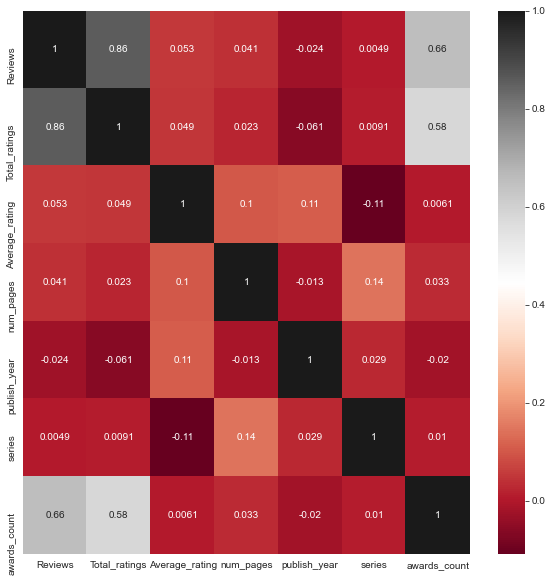

In [237]:
plt.figure(figsize=(10,10))
sns.heatmap(df10.corr(),annot=True,cmap="RdGy",)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



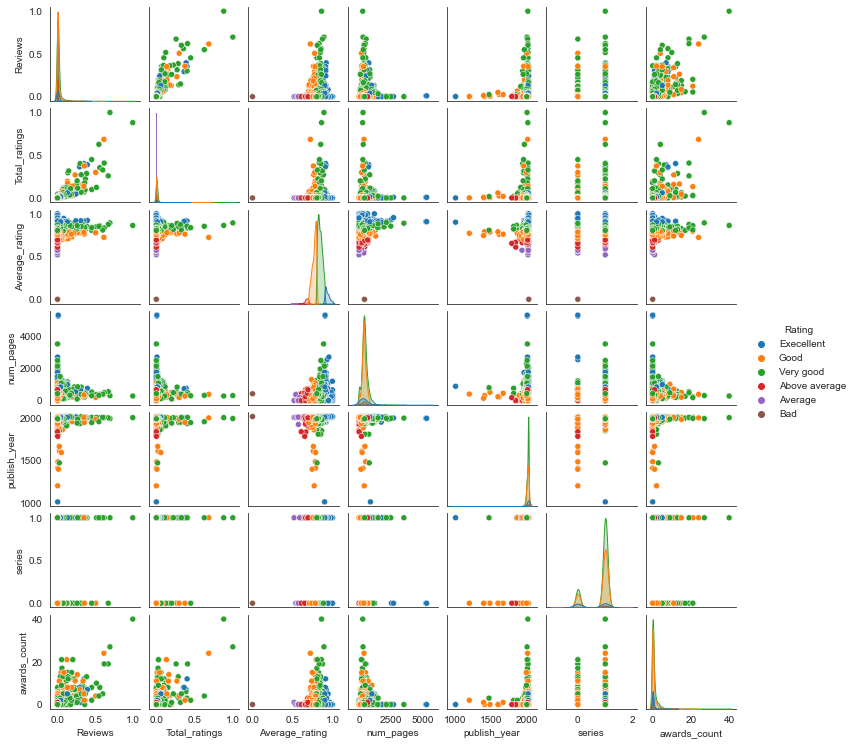

In [240]:
# def corrfunc(x,y,**kws):
#     r,_= stats.pearsonr(x,y)
#     ax = plt.gca()
#     ax.annotate("r={:.2f}".format(r),xy=(0.1,1.0),xycoords=ax.transAxes)

df10_pairplot = df10.dropna()
pair_plot=sns.pairplot(df10_pairplot,height=1.5,hue="Rating",)
# pair_plot.map_lower(corrfunc)
# pair_plot.map_upper(corrfunc)


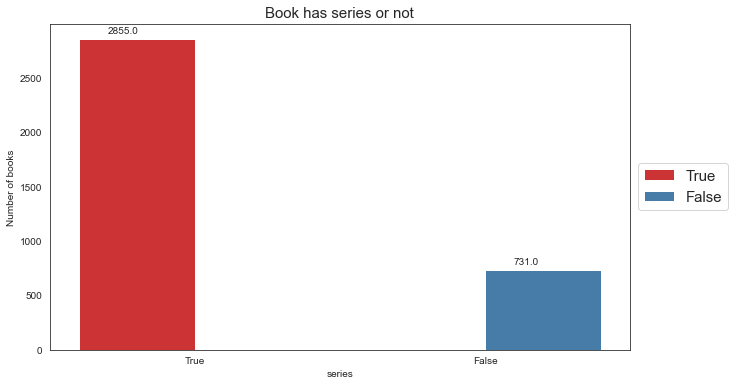

In [249]:
# CountPlot Series
plt.figure(figsize=(13,6))
ax = sns.countplot(x="series_bol", hue="series_bol", data=df,palette="Set1")
ax.set_title('Book has series or not', size=15)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set(xlabel='series', ylabel='Number of books')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

In [250]:

fig = px.pie(df, values='series', names='series_bol', title='Book series')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Name of the Authors')

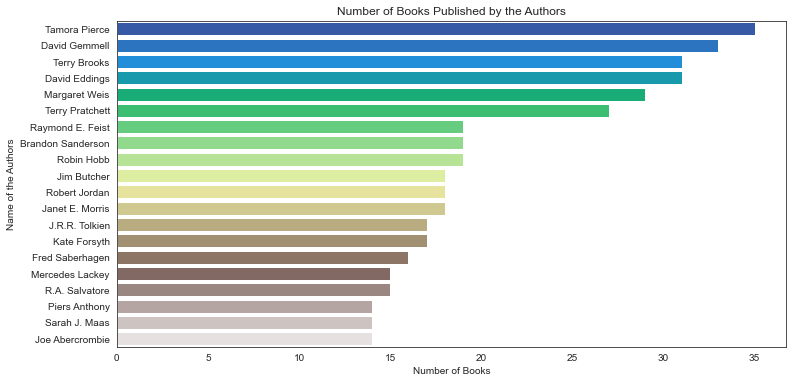

In [251]:
plt.figure(figsize=(12,6))
top_author=df['author'].value_counts()[:20]
sns.barplot(top_author.values, top_author.index, palette='terrain').set_title('Number of Books Published by the Authors')
plt.xlabel("Number of Books")
plt.ylabel("Name of the Authors")